In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load data

df = pd.read_csv("../data/winequality.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


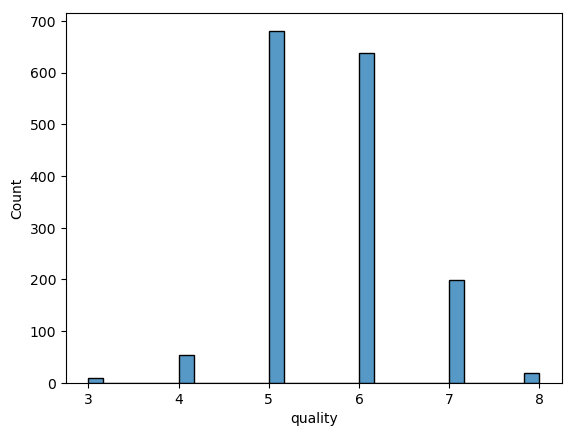

In [6]:
sns.histplot(df['quality'])

In [7]:
corr = df.corr()

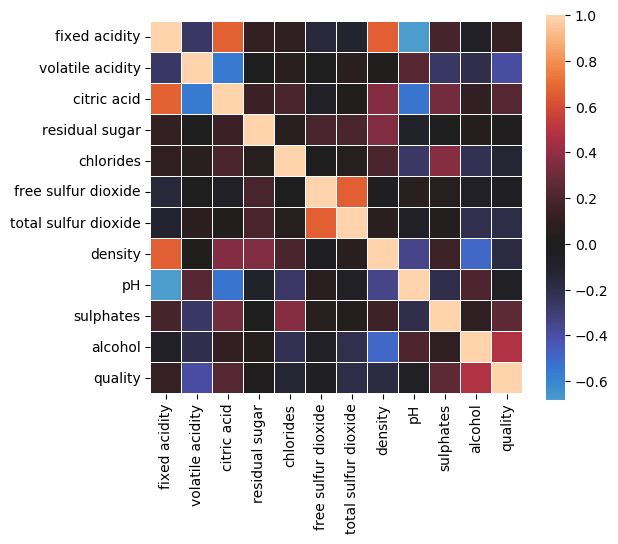

In [9]:
f, ax = plt.subplots(figsize=(6,5))

# sns heatmap
sns.heatmap(corr, center=0, square=True, linewidths=0.5)
plt.show()

In [10]:
## ML Trainig

In [11]:
X = df.drop('quality', axis = 1)
y = df['quality']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

In [13]:
df.shape

(1599, 12)

In [14]:
X_train.shape

(1199, 11)

In [15]:
X_test.shape

(400, 11)

In [16]:
############ training

In [17]:
alpha = 0.5
l1 = 0.5

lr = ElasticNet(alpha=alpha, l1_ratio=l1)

In [18]:
lr.fit(X_train, y_train)

ElasticNet(alpha=0.5)

In [19]:
def eval_metrics(ground_truth, pred):
    
    rmse = np.sqrt(metrics.mean_squared_error(ground_truth, pred))
    mae = metrics.mean_absolute_error(ground_truth, pred)
    r2  = metrics.r2_score(ground_truth, pred)
    
    return rmse, mae, r2

In [20]:
y_pred = lr.predict(X_train)

In [21]:
y_pred.shape

(1199,)

In [22]:
rmse, mae, r2 = eval_metrics(y_train, y_pred)

In [23]:
print(f"Our metrics {rmse}, {mae, {r2}}")

Our metrics 0.7577741148316872, (0.61353431258984, {0.12054192894819826})


In [24]:
######## putting it all together

In [25]:
import mlflow

In [27]:
import pandas as pd
import numpy as np

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns


def eval_metrics(ground_truth, pred):
    
    rmse = np.sqrt(metrics.mean_squared_error(ground_truth, pred))
    mae = metrics.mean_absolute_error(ground_truth, pred)
    r2  = metrics.r2_score(ground_truth, pred)
    
    return rmse, mae, r2

df = pd.read_csv("../data/winequality.csv")

X = df.drop('quality', axis = 1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

################# mlflow logging code

with mlflow.start_run():
    

    alpha = 0.5
    l1 = 0.5

    lr = ElasticNet(alpha=alpha, l1_ratio=l1)
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_train)
    rmse, mae, r2 = eval_metrics(y_train, y_pred)
    
    # actual logging parameters and metrics
    
    # logged hyperparamters
    mlflow.log_param("alpha", alpha)
    mlflow.log_param("l1 ratio", l1)
    
    # logged metrics
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("r2", r2)
    

In [ ]:
#### create new experiment, new run names, tags

In [36]:
import pandas as pd
import numpy as np

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns


def eval_metrics(ground_truth, pred):
    
    rmse = np.sqrt(metrics.mean_squared_error(ground_truth, pred))
    mae = metrics.mean_absolute_error(ground_truth, pred)
    r2  = metrics.r2_score(ground_truth, pred)
    
    return rmse, mae, r2

df = pd.read_csv("../data/winequality.csv")

X = df.drop('quality', axis = 1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

################# mlflow logging code

experiment_name = "Exp-1"
run_name = "first mlflow custom run"

tags = {
    "Demo": "True",
    "Created by": "Saumya"
}

mlflow.set_experiment(experiment_name)


with mlflow.start_run(run_name=run_name):
    

    alpha = 1
    l1 = 0.5

    lr = ElasticNet(alpha=alpha, l1_ratio=l1)
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_train)
    rmse, mae, r2 = eval_metrics(y_train, y_pred)
    
    # actual logging parameters and metrics
    
    # logged hyperparamters
    mlflow.log_param("alpha", alpha)
    mlflow.log_param("l1 ratio", l1)
    
    # logged metrics
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("r2", r2)
    
    ## log tags
    mlflow.set_tags(tags)
    

In [37]:
########## autologging

In [39]:
import pandas as pd
import numpy as np

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

mlflow.sklearn.autolog(log_models = True)

def eval_metrics(ground_truth, pred):
    
    rmse = np.sqrt(metrics.mean_squared_error(ground_truth, pred))
    mae = metrics.mean_absolute_error(ground_truth, pred)
    r2  = metrics.r2_score(ground_truth, pred)
    
    return rmse, mae, r2

df = pd.read_csv("../data/winequality.csv")

X = df.drop('quality', axis = 1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

################# mlflow logging code

experiment_name = "Exp-2"
run_name = "autologging_1"

tags = {
    "Demo": "True",
    "Created by": "Saumya"
}

mlflow.set_experiment(experiment_name)


with mlflow.start_run(run_name=run_name):
    

    alpha = 1
    l1 = 0.5

    lr = ElasticNet(alpha=alpha, l1_ratio=l1)
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_train)
    rmse, mae, r2 = eval_metrics(y_train, y_pred)
    
    # actual logging parameters and metrics
    
#     # logged hyperparamters
#     mlflow.log_param("alpha", alpha)
#     mlflow.log_param("l1 ratio", l1)
    
#     # logged metrics
#     mlflow.log_metric("rmse", rmse)
#     mlflow.log_metric("mae", mae)
#     mlflow.log_metric("r2", r2)
    
    ## log tags
    mlflow.set_tags(tags)
    
#     mlflow.sklearn.autolog(log_models = True)
    

In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

mlflow.sklearn.autolog(log_models = True)

def eval_metrics(ground_truth, pred):
    
    rmse = np.sqrt(metrics.mean_squared_error(ground_truth, pred))
    mae = metrics.mean_absolute_error(ground_truth, pred)
    r2  = metrics.r2_score(ground_truth, pred)
    
    return rmse, mae, r2

df = pd.read_csv("../data/winequality.csv")

X = df.drop('quality', axis = 1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

################# mlflow logging code

experiment_name = "Exp-2"
run_name = "autologging_1"

tags = {
    "Demo": "True",
    "Created by": "Saumya"
}

mlflow.set_experiment(experiment_name)


with mlflow.start_run(run_name=run_name):
    

    alpha = 1
    l1 = 0.5

    lr = ElasticNet(alpha=alpha, l1_ratio=l1)
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_train)
    rmse, mae, r2 = eval_metrics(y_train, y_pred)
    
    # actual logging parameters and metrics
    
#     # logged hyperparamters
#     mlflow.log_param("alpha", alpha)
#     mlflow.log_param("l1 ratio", l1)
    
#     # logged metrics
#     mlflow.log_metric("rmse", rmse)
#     mlflow.log_metric("mae", mae)
#     mlflow.log_metric("r2", r2)
    
    ## log tags
    mlflow.set_tags(tags)
    
#     mlflow.sklearn.autolog(log_models = True)
    